In [0]:
filepath = '/FileStore/tables/WA_Fn_UseC__Telco_Customer_Churn.csv'

infer_schema='true'
header='true'
delimiter=','

df = spark.read.format('csv')\
  .option('inferSchema',infer_schema)\
  .option('header',header)\
  .option('sep',delimiter)\
  .option('nullValue', ' ')\
  .option('nanValue', ' ')\
  .load(filepath)

display(df)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [0]:
df.printSchema()

root
-- customerID: string (nullable = true)
-- gender: string (nullable = true)
-- SeniorCitizen: integer (nullable = true)
-- Partner: string (nullable = true)
-- Dependents: string (nullable = true)
-- tenure: integer (nullable = true)
-- PhoneService: string (nullable = true)
-- MultipleLines: string (nullable = true)
-- InternetService: string (nullable = true)
-- OnlineSecurity: string (nullable = true)
-- OnlineBackup: string (nullable = true)
-- DeviceProtection: string (nullable = true)
-- TechSupport: string (nullable = true)
-- StreamingTV: string (nullable = true)
-- StreamingMovies: string (nullable = true)
-- Contract: string (nullable = true)
-- PaperlessBilling: string (nullable = true)
-- PaymentMethod: string (nullable = true)
-- MonthlyCharges: double (nullable = true)
-- TotalCharges: double (nullable = true)
-- Churn: string (nullable = true)

In [0]:
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 11| 0|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+

In [0]:
display(df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]))

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0


In [0]:
temp_table = 'churn_analysis'
df.createOrReplaceTempView(temp_table)

In [0]:
pd_df = df.toPandas()

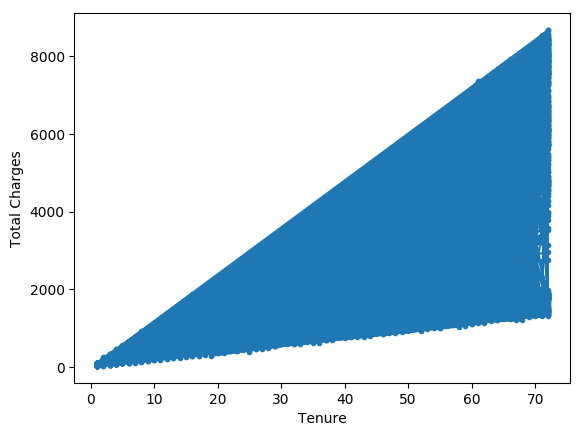

In [0]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['tenure'], pd_df['TotalCharges'], marker='.')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
display()

In [0]:
%sql
select gender, churn, count(customerID) as num_cust from churn_analysis group by gender, churn

gender,churn,num_cust
Male,No,2625
Male,Yes,930
Female,No,2549
Female,Yes,939


In [0]:
df.groupBy('Churn').count().show()

+-----+-----+
Churn|count|
+-----+-----+
 No| 5174|
 Yes| 1869|
+-----+-----+

In [0]:
df.select('tenure','TotalCharges','MonthlyCharges').describe().show()

+-------+------------------+------------------+------------------+
summary| tenure| TotalCharges| MonthlyCharges|
+-------+------------------+------------------+------------------+
 count| 7043| 7032| 7043|
 mean| 32.37114865824223|2283.3004408418697| 64.76169246059922|
 stddev|24.559481023094442| 2266.771361883145|30.090047097678482|
 min| 0| 18.8| 18.25|
 max| 72| 8684.8| 118.75|
+-------+------------------+------------------+------------------+

In [0]:
%sql
select SeniorCitizen, churn, count(customerID) as num_cust from churn_analysis group by SeniorCitizen, churn

SeniorCitizen,churn,num_cust
1,No,666
0,No,4508
0,Yes,1393
1,Yes,476


In [0]:
%sql
select cast(tenure as int), churn, count(churn) from churn_analysis group by tenure, churn order by cast(tenure as int)

tenure,churn,count(churn)
0,No,11
1,No,233
1,Yes,380
2,No,115
2,Yes,123
3,No,106
3,Yes,94
4,No,93
4,Yes,83
5,No,69


In [0]:
df.stat.crosstab('SeniorCitizen','InternetService').show()

+-----------------------------+----+-----------+----+
SeniorCitizen_InternetService| DSL|Fiber optic| No|
+-----------------------------+----+-----------+----+
 1| 259| 831| 52|
 0|2162| 2265|1474|
+-----------------------------+----+-----------+----+

In [0]:
df.stat.freqItems(['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], 0.6).collect()

Out[11]: [Row(PhoneService_freqItems=['Yes'], MultipleLines_freqItems=['Yes'], InternetService_freqItems=['Fiber optic'], OnlineSecurity_freqItems=['No'], OnlineBackup_freqItems=['Yes'], DeviceProtection_freqItems=['No'], TechSupport_freqItems=['No'], StreamingTV_freqItems=['Yes'], StreamingMovies_freqItems=['No'])]

In [0]:
%sql
select PaperlessBilling, PaymentMethod, churn, count(customerID) from churn_analysis group by PaperlessBilling, PaymentMethod, churn

PaperlessBilling,PaymentMethod,churn,count(customerID)
Yes,Electronic check,No,875
Yes,Bank transfer (automatic),No,705
No,Bank transfer (automatic),No,581
Yes,Mailed check,Yes,179
Yes,Bank transfer (automatic),Yes,186
No,Electronic check,No,419
No,Electronic check,Yes,204
No,Credit card (automatic),No,576
No,Bank transfer (automatic),Yes,72
No,Mailed check,Yes,129


In [0]:
churn_df = df
(train_data, test_data) = churn_df.randomSplit([0.7,0.3], 24)

In [0]:
print(f'Train Set: {train_data.count()}')
print(f'Test Set: {test_data.count()}')

Train Set: 4916
Test Set: 2127

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [0]:
stages=[]
for col in cat_cols:
  stringIndexer = StringIndexer(inputCol=col, outputCol=col+'Index')
  encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[col+'catVec'])
  stages+=[stringIndexer, encoder]

In [0]:
stages

Out[16]: [StringIndexer_75a82dddf9d7,
 OneHotEncoderEstimator_f99d5026056c,
 StringIndexer_9574a2c3a811,
 OneHotEncoderEstimator_cd1052449429,
 StringIndexer_fd5fc1d5498e,
 OneHotEncoderEstimator_e6a2df05e5b0,
 StringIndexer_63b5742f0b76,
 OneHotEncoderEstimator_7096ade2a2f1,
 StringIndexer_4fe76521b963,
 OneHotEncoderEstimator_1809b1fb8c18,
 StringIndexer_154d8d982e22,
 OneHotEncoderEstimator_fc36da2a2538,
 StringIndexer_8725228c7b49,
 OneHotEncoderEstimator_d8883e9fd74c,
 StringIndexer_3c1cf3481299,
 OneHotEncoderEstimator_dae08925a61f,
 StringIndexer_765c16b07ab1,
 OneHotEncoderEstimator_c975ff824d54,
 StringIndexer_afc74e6e23e6,
 OneHotEncoderEstimator_24378b5be117,
 StringIndexer_62b944fa177a,
 OneHotEncoderEstimator_1b09c7f1dd85,
 StringIndexer_b88d06fd78da,
 OneHotEncoderEstimator_434543c42ae7,
 StringIndexer_318e07bb7bf2,
 OneHotEncoderEstimator_684573e5a779,
 StringIndexer_25dab1ba84dd,
 OneHotEncoderEstimator_44f1ddf35fb6,
 StringIndexer_5caa6dbe8a4f,
 OneHotEncoderEstimator_96842794575d,
 StringIndexer_8d985e58e704,
 OneHotEncoderEstimator_02ef9ae44617]

In [0]:
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=['TotalCharges'], outputCols=['Out_TotalCharges'])
stages += [imputer]

In [0]:
label_Idx = StringIndexer(inputCol='Churn', outputCol='label')
stages += [label_Idx]

In [0]:
df.stat.corr('TotalCharges','MonthlyCharges')

Out[19]: 0.6511738315787813

In [0]:
%sql
select cast(tenure as int), churn, count(customerID)as churned from churn_analysis where churn='Yes' group by tenure, churn order by cast(tenure as int)

tenure,churn,churned
1,Yes,380
2,Yes,123
3,Yes,94
4,Yes,83
5,Yes,64
6,Yes,40
7,Yes,51
8,Yes,42
9,Yes,46
10,Yes,45


In [0]:
from pyspark.ml.feature import QuantileDiscretizer

tenure_bin = QuantileDiscretizer(numBuckets=3, inputCol='tenure', outputCol='tenure_bin')
stages += [tenure_bin]

In [0]:
stages

Out[21]: [StringIndexer_75a82dddf9d7,
 OneHotEncoderEstimator_f99d5026056c,
 StringIndexer_9574a2c3a811,
 OneHotEncoderEstimator_cd1052449429,
 StringIndexer_fd5fc1d5498e,
 OneHotEncoderEstimator_e6a2df05e5b0,
 StringIndexer_63b5742f0b76,
 OneHotEncoderEstimator_7096ade2a2f1,
 StringIndexer_4fe76521b963,
 OneHotEncoderEstimator_1809b1fb8c18,
 StringIndexer_154d8d982e22,
 OneHotEncoderEstimator_fc36da2a2538,
 StringIndexer_8725228c7b49,
 OneHotEncoderEstimator_d8883e9fd74c,
 StringIndexer_3c1cf3481299,
 OneHotEncoderEstimator_dae08925a61f,
 StringIndexer_765c16b07ab1,
 OneHotEncoderEstimator_c975ff824d54,
 StringIndexer_afc74e6e23e6,
 OneHotEncoderEstimator_24378b5be117,
 StringIndexer_62b944fa177a,
 OneHotEncoderEstimator_1b09c7f1dd85,
 StringIndexer_b88d06fd78da,
 OneHotEncoderEstimator_434543c42ae7,
 StringIndexer_318e07bb7bf2,
 OneHotEncoderEstimator_684573e5a779,
 StringIndexer_25dab1ba84dd,
 OneHotEncoderEstimator_44f1ddf35fb6,
 StringIndexer_5caa6dbe8a4f,
 OneHotEncoderEstimator_96842794575d,
 StringIndexer_8d985e58e704,
 OneHotEncoderEstimator_02ef9ae44617,
 Imputer_0bd7d08691ad,
 StringIndexer_2753b955f4cd,
 QuantileDiscretizer_9caaa28f1d6b]

In [0]:
numericCols = ['tenure_bin','Out_TotalCharges','MonthlyCharges']
assembleInputs = assemblerInputs = [c + 'catVec' for c in cat_cols] + numericCols
assembler = VectorAssembler(inputCols=assembleInputs, outputCol='features')
stages+=[assembler]

In [0]:
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(train_data)

In [0]:
train_df = pipelineModel.transform(train_data)
test_df = pipelineModel.transform(test_data)

In [0]:
train_df.head(1)

Out[27]: [Row(customerID='0004-TLHLJ', gender='Male', SeniorCitizen=0, Partner='No', Dependents='No', tenure=4, PhoneService='Yes', MultipleLines='No', InternetService='Fiber optic', OnlineSecurity='No', OnlineBackup='No', DeviceProtection='Yes', TechSupport='No', StreamingTV='No', StreamingMovies='No', Contract='Month-to-month', PaperlessBilling='Yes', PaymentMethod='Electronic check', MonthlyCharges=73.9, TotalCharges=280.85, Churn='Yes', genderIndex=1.0, gendercatVec=SparseVector(1, {}), SeniorCitizenIndex=0.0, SeniorCitizencatVec=SparseVector(1, {0: 1.0}), PartnerIndex=0.0, PartnercatVec=SparseVector(1, {0: 1.0}), DependentsIndex=0.0, DependentscatVec=SparseVector(1, {0: 1.0}), PhoneServiceIndex=0.0, PhoneServicecatVec=SparseVector(1, {0: 1.0}), MultipleLinesIndex=0.0, MultipleLinescatVec=SparseVector(2, {0: 1.0}), InternetServiceIndex=0.0, InternetServicecatVec=SparseVector(2, {0: 1.0}), OnlineSecurityIndex=0.0, OnlineSecuritycatVec=SparseVector(2, {0: 1.0}), OnlineBackupIndex=0.0, OnlineBackupcatVec=SparseVector(2, {0: 1.0}), DeviceProtectionIndex=1.0, DeviceProtectioncatVec=SparseVector(2, {1: 1.0}), TechSupportIndex=0.0, TechSupportcatVec=SparseVector(2, {0: 1.0}), StreamingTVIndex=0.0, StreamingTVcatVec=SparseVector(2, {0: 1.0}), StreamingMoviesIndex=0.0, StreamingMoviescatVec=SparseVector(2, {0: 1.0}), ContractIndex=0.0, ContractcatVec=SparseVector(2, {0: 1.0}), PaperlessBillingIndex=0.0, PaperlessBillingcatVec=SparseVector(1, {0: 1.0}), PaymentMethodIndex=0.0, PaymentMethodcatVec=SparseVector(3, {0: 1.0}), Out_TotalCharges=280.85, label=1.0, tenure_bin=0.0, features=SparseVector(30, {1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 7: 1.0, 9: 1.0, 11: 1.0, 14: 1.0, 15: 1.0, 17: 1.0, 19: 1.0, 21: 1.0, 23: 1.0, 24: 1.0, 28: 280.85, 29: 73.9}))]

In [0]:
train_df.select('tenure_bin').show()

+----------+
tenure_bin|
+----------+
 0.0|
 0.0|
 2.0|
 0.0|
 2.0|
 2.0|
 0.0|
 2.0|
 0.0|
 1.0|
 2.0|
 0.0|
 1.0|
 0.0|
 0.0|
 2.0|
 1.0|
 2.0|
 2.0|
 1.0|
+----------+
only showing top 20 rows

In [0]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol='label', featuresCol='features', maxIter=10)
lrModel = lr.fit(train_df)

In [0]:
print(f'Coeff: {lrModel.coefficients}')
print(f'Intercept: {lrModel.intercept}')

Coeff: [-0.022125908958674088,-0.2959666028531403,-0.04540190713044164,0.11422451989175891,-0.5443650552564756,-0.2578717959455513,0.06759355518729313,0.5589400869146011,-0.3986256243196871,0.30003152767252406,-0.134954906292892,0.1906494657387728,0.003426387983986442,0.11393776372551714,0.08647003066023518,0.26398039586831756,-0.0886629995806309,0.005764718914013294,0.19468869632082145,-0.012545144725578933,0.212492517490871,0.7226916232199253,-0.7941298473778357,0.3045835782392517,0.18868980558464638,-0.11391177062150903,-0.27808713414588604,-0.6330144913097796,-0.00011781853833584475,0.004850253631019683]
Intercept: -1.1241531294140918

In [0]:
summary = lrModel.summary

In [0]:
accuracy = summary.accuracy
fpr = summary.weightedFalsePositiveRate
tpr = summary.weightedTruePositiveRate
f_score = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
auc = summary.areaUnderROC

print(f'Accuracy:{accuracy}')
print(f'FPR:{fpr}')
print(f'TPR:{tpr}')
print(f'F Score:{f_score}')
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'AUC:{auc}')

Accuracy:0.7971928397070789
FPR:0.3543249783512605
TPR:0.7971928397070789
F Score:0.7916719573031158
Precision:0.7893734580163737
Recall:0.7971928397070789
AUC:0.8462856449884067

In [0]:
display(lrModel, train_df, 'ROC')

False Positive Rate,True Positive Rate,Threshold
0.0,0.0,0.8331148512857078
0.0,0.038461538461538464,0.8331148512857078
0.015384615384615385,0.038461538461538464,0.7797057517363821
0.015384615384615385,0.07692307692307693,0.7586357194568448
0.015384615384615385,0.11538461538461539,0.6987165453214434
0.03076923076923077,0.11538461538461539,0.6915118402949202
0.03076923076923077,0.15384615384615385,0.6860604944548899
0.046153846153846156,0.15384615384615385,0.6450038522648787
0.046153846153846156,0.19230769230769232,0.6429123845502271
0.046153846153846156,0.23076923076923078,0.6295249580338602


In [0]:
display(lrModel, train_df, 'fittedVsResiduals')

fitted values,residuals
-0.22306764063657825,-0.44446318790067446
-2.553276223691306,-0.07220669382587351
-2.152370097862412,-0.10410995403900321
-3.5228682836249368,-0.02866851581664729
0.5880272814371096,0.35708761544977285
-0.759899964509167,0.6813320146072503
-2.557741016374676,-0.07190815518055696
-1.8696124131497969,-0.13358657593088336
-3.077465588498432,-0.04404640690879954
0.039719025855596723,0.4900715487630114


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = lrModel.transform(test_df)
eval_LR = BinaryClassificationEvaluator(rawPredictionCol='prediction')
auc_lr = eval_LR.evaluate(predictions)

print(auc_lr)

0.7230887671429083

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

results = predictions.select(['prediction','label'])

results_coll = results.collect()
results_list = [(float(i[0]), float(i[1])) for i in results_coll]
pred_label = sc.parallelize(results_list)

metrics = BinaryClassificationMetrics(pred_label)

print(f'Area under PR: {metrics.areaUnderPR}')
print(f'Area under ROC: {metrics.areaUnderROC}')

Area under PR: 0.5264394725677182
Area under ROC: 0.7230887671429083

In [0]:
display(predictions)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,genderIndex,gendercatVec,SeniorCitizenIndex,SeniorCitizencatVec,PartnerIndex,PartnercatVec,DependentsIndex,DependentscatVec,PhoneServiceIndex,PhoneServicecatVec,MultipleLinesIndex,MultipleLinescatVec,InternetServiceIndex,InternetServicecatVec,OnlineSecurityIndex,OnlineSecuritycatVec,OnlineBackupIndex,OnlineBackupcatVec,DeviceProtectionIndex,DeviceProtectioncatVec,TechSupportIndex,TechSupportcatVec,StreamingTVIndex,StreamingTVcatVec,StreamingMoviesIndex,StreamingMoviescatVec,ContractIndex,ContractcatVec,PaperlessBillingIndex,PaperlessBillingcatVec,PaymentMethodIndex,PaymentMethodcatVec,Out_TotalCharges,label,tenure_bin,features,rawPrediction,probability,prediction
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No,0.0,"List(0, 1, List(0), List(1.0))",0.0,"List(0, 1, List(0), List(1.0))",1.0,"List(0, 1, List(), List())",1.0,"List(0, 1, List(), List())",0.0,"List(0, 1, List(0), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",2.0,"List(0, 2, List(), List())",0.0,"List(0, 1, List(0), List(1.0))",1.0,"List(0, 3, List(1), List(1.0))",593.3,0.0,0.0,"List(0, 30, List(0, 1, 4, 5, 8, 9, 12, 13, 16, 18, 19, 23, 25, 28, 29), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 593.3, 65.6))","List(1, 2, List(), List(1.6932851783330038, -1.6932851783330038))","List(1, 2, List(), List(0.844655704389517, 0.15534429561048296))",0.0
0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No,1.0,"List(0, 1, List(), List())",0.0,"List(0, 1, List(0), List(1.0))",0.0,"List(0, 1, List(0), List(1.0))",0.0,"List(0, 1, List(0), List(1.0))",0.0,"List(0, 1, List(0), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",1.0,"List(0, 1, List(), List())",1.0,"List(0, 3, List(1), List(1.0))",542.4,0.0,0.0,"List(0, 30, List(1, 2, 3, 4, 6, 8, 9, 11, 13, 15, 17, 20, 21, 25, 28, 29), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 542.4, 59.9))","List(1, 2, List(), List(0.3044325845816356, -0.3044325845816356))","List(1, 2, List(), List(0.5755257397472797, 0.4244742602527202))",0.0
0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,1.0,"List(0, 1, List(), List())",1.0,"List(0, 1, List(), List())",1.0,"List(0, 1, List(), List())",0.0,"List(0, 1, List(0), List(1.0))",0.0,"List(0, 1, List(0), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",1.0,"List(0, 2, List(1), List(1.0))",0.0,"List(0, 2, List(0), List(1.0))",0.0,"List(0, 1, List(0), List(1.0))",0.0,"List(0, 3, List(0), List(1.0))",1237.85,1.0,0.0,"List(0, 30, List(3, 4, 5, 7, 9, 12, 14, 15, 18, 20, 21, 23, 24, 28, 29), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1237.85, 98.0))","List(1, 2, List(), List(-1.3533123673917238, 1.3533123673917238))","List(1, 2, List(), List(0.20532936784584063, 0.7946706321541593))",1.0
0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Ye

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
            .addGrid(lr.regParam, [0.01, 0.5, 1.5])
            .addGrid(lr.elasticNetParam, [0.0, 0.5, 1])
            .addGrid(lr.maxIter, [5,10,20])
            .build())

In [0]:
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=eval_LR, numFolds=5)
cvModel = cv.fit(train_df)

/databricks/spark/python/pyspark/ml/util.py:791: UserWarning: Can not find mlflow. To enable mlflow logging, install MLflow library from PyPi.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
predictions = cvModel.bestModel.transform(test_df)

In [0]:
eval_LR.evaluate(predictions)

Out[50]: 0.7230189422422745

In [0]:
cvModel.explainParams()

Out[51]: "estimator: estimator to be cross-validated (current: LogisticRegression_c5d1c7354290)\nestimatorParamMaps: estimator param maps (current: [{Param(parent='LogisticRegression_c5d1c7354290', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_c5d1c7354290', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_c5d1c7354290', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_c5d1c7354290', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_c5d1c7354290', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_c5d1c7354290', name='maxIter', doc='max number of iterations (>= 0).'): 10}, {Param(parent='LogisticRegression_c5d1c7354290', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_c5d1c7354290', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_c5d1c7354290', name='maxIter', doc='max number of iterations (>= 0).'): 20}, {Param(parent='LogisticRegression_c5d1c7354290', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_c5d1c7354290', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5, Param(parent='LogisticRegression_c5d1c7354290', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_c5d1c7354290', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_c5d1c7354290', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5, Param(parent='LogisticRegression_c5d1c7354290', name='maxIter', doc='max number of iterations (>= 0).'): 10}, {Param(parent='LogisticRegression_c5d1c7354290', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_c5d1c7354290', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5, Param(parent='LogisticRegression_c5d1c7354290', name='maxIter', doc='max number of iterations (>= 0).'): 20}, {Param(parent='LogisticRegression_c5d1c7354290', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_c5d1c7354290', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent='LogisticRegression_c5d1c7354290', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_c5d1c7354290', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_c5d1c7354290', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent='LogisticRegression_c5d1c7354290', name='maxIter', doc='max number of iterations (>= 0).'): 10}, {Param(parent='LogisticRegression_c5d1c7354290', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_c5d1c7354290', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent=

In [0]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='label', featuresCol='features').setImpurity('gini').setMaxDepth(6).setNumTrees(50).setFeatureSubsetStrategy('auto').setSeed(18)
rfModel = rf.fit(train_df)

In [0]:
predictions = rfModel.transform(test_df) 